# Customer Churn Prediction


## In this project, we will predict whether a customer will leave the bank or not based on many factors such as

##
Following Factors are:

1. Credit score 
1. Location of the Customer 
1. Gender 
1. Age 
1. Tenure 
1. Account Balance 
1. Number of Bank Products Customer Uses 
1. Has Credit Card 
1. Is Active Member 
1. Estimated Salary

In [124]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/844/1*MyKDLRda6yHGR_8kgVvckg.png')

In [125]:
import pandas as pd

In [126]:
data = pd.read_csv('Churn_Modelling.csv')

### 1. Display Top 5 Rows of The Datase

In [127]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2. Check Last 5 Rows of The Dataset

In [128]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [129]:
data.shape

(10000, 14)

In [130]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### 5.Check Null Values In The Dataset

In [132]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 6. Get Overall Statistics About The Dataset

In [133]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### 7. Dropping Irrelevant Features

In [134]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [135]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [136]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 8. Encoding Categorical Data

In [137]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [138]:
data = pd.get_dummies(data,drop_first=True)

In [139]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Not Handling Imbalanced

In [140]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [141]:
import seaborn as sns

<Axes: ylabel='count'>

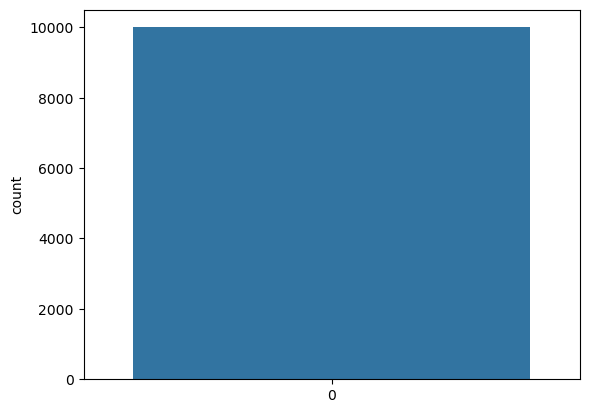

In [142]:
sns.countplot(data['Exited'])

In [143]:
X = data.drop('Exited',axis=1)
y = data['Exited']

### 9. Handling Imbalanced Data With SMOTE

In [144]:
from imblearn.over_sampling import SMOTE

In [145]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [146]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

### 10. Splitting The Dataset Into The Training Set And Test Set

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

### 11. Feature Scaling

In [149]:

from sklearn.preprocessing import StandardScaler

In [150]:
sc= StandardScaler()

In [151]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [152]:
X_train

array([[-0.77053226,  1.40214303,  0.81182643, ..., -0.57650433,
        -0.46087915, -0.84797774],
       [ 1.10309389,  0.09923265, -1.39790943, ..., -0.57650433,
        -0.46087915,  1.17927623],
       [-0.01890316,  0.7005759 , -1.02962012, ...,  1.73459234,
        -0.46087915, -0.84797774],
       ...,
       [ 0.20985352,  0.19945653,  1.18011574, ..., -0.57650433,
        -0.46087915,  1.17927623],
       [-0.51998923, -0.30166285, -1.39790943, ...,  1.73459234,
        -0.46087915, -0.84797774],
       [ 0.53664877,  1.00124753, -1.39790943, ...,  1.73459234,
        -0.46087915,  1.17927623]])

### 12. Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
log = LogisticRegression()

In [155]:
log.fit(X_train,y_train)

LogisticRegression()

In [156]:
y_pred1 = log.predict(X_test)

In [157]:
from sklearn.metrics import accuracy_score

In [158]:
accuracy_score(y_test,y_pred1)

0.7809165097300691

In [159]:
accuracy_score(y_test,y_pred1)

0.7809165097300691

In [160]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [161]:
precision_score(y_test,y_pred1)

0.770056854074542

In [162]:
recall_score(y_test,y_pred1)

0.784932388924662

In [163]:
f1_score(y_test,y_pred1)

0.7774234693877551

In [ ]:
pc = TP / (FP + TP)

In [ ]:
rc = TP / (TP + FN)

### 13. SVC

In [164]:
from sklearn import svm

In [165]:
svm = svm.SVC()

In [167]:
svm.fit(X_train,y_train)

SVC()

In [168]:
y_pred2 = svm.predict(X_test)

In [169]:
accuracy_score(y_test,y_pred2)

0.844632768361582

In [170]:
precision_score(y_test,y_pred2)

0.8360864040660737

### 14. KNeighbors Classifier

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
knn = KNeighborsClassifier()

In [173]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [174]:
y_pred3 = knn.predict(X_test)

In [175]:
accuracy_score(y_test,y_pred3)

0.8192090395480226

In [176]:
precision_score(y_test,y_pred3)

0.8051217988757027

### 15. Decision Tree Classifier

In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
dt = DecisionTreeClassifier()

In [179]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [180]:
y_pred4 = dt.predict(X_test)

In [181]:
accuracy_score(y_test,y_pred4)

0.7824858757062146

In [182]:
precision_score(y_test,y_pred4)

0.7584134615384616

### 16. Random Forest Classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
rf = RandomForestClassifier()

In [185]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [186]:
y_pred5 = rf.predict(X_test)

In [187]:
accuracy_score(y_test,y_pred5)

0.85969868173258

In [188]:
precision_score(y_test,y_pred5)

0.8513341804320204

### 17. Gradient Boosting Classifier

In [189]:
from sklearn.ensemble import GradientBoostingClassifier

In [190]:
gbc = GradientBoostingClassifier()

In [191]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [192]:
y_pred6 = gbc.predict(X_test)

In [193]:
accuracy_score(y_test,y_pred6)

0.8430634023854363

In [194]:
precision_score(y_test,y_pred6)

0.8385852090032154

In [195]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [196]:
final_data

,Models,ACC
0,LR,0.780917
1,SVC,0.844633
2,KNN,0.819209
3,DT,0.782486
4,RF,0.859699
5,GBC,0.843063


In [197]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5),
                              precision_score(y_test,y_pred6)]})

In [198]:
final_data

,Models,PRE
0,LR,0.770057
1,SVC,0.836086
2,KNN,0.805122
3,DT,0.758413
4,RF,0.851334
5,GBC,0.838585


### 18. Save The Model

In [199]:
X_res=sc.fit_transform(X_res)

In [200]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [201]:
import joblib

In [202]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [203]:
model = joblib.load('churn_predict_model')

In [204]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [205]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

In [206]:
model.predict([[200,22,2,500,0,1,1,5000.23,0,0,1]])

array([0], dtype=int64)

In [207]:
model.predict([[700,23,1,1500.00,1,1,1,15000,1,1,1]])

array([0], dtype=int64)

In [208]:
model.predict([[700,23,1,1500.00,1,1,1,15000,1,1,1]])

array([0], dtype=int64)

In [209]:

model.predict([[50,22,1,15,0,0,0,50,0,1,0]])

array([1], dtype=int64)